# Reading current covid-19 data from Johns Hopkins CSSE Github-Repo and analizing it using pandas, numpy and matplotlib

## Installing the required libraries so it will run on your system

In [1]:
print('Installing required packages to run on your system, please wait...')
!pip -q install pandas numpy scipy matplotlib lmfit;
print('Done installing requirements.')

In [2]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

## The pulling the data form Johns Hopkins CSSE Github-Repo

In [3]:
source_file = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"

In [4]:
df = pd.read_csv(source_file)

## Exploring the data

In [5]:
df.head(10)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,22,22,24,24,40,40,74,84,94,110
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,59,64,70,76,89,104,123,146,174,186
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,74,87,90,139,201,230,264,302,367,409
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,39,53,75,88,113,133,164,188,224,267
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,0,0,1,2,2,3,3,3,4,4
5,NaN,Antigua and Barbuda,17.0608,-61.7964,0,0,0,0,0,0,...,1,1,1,1,1,3,3,3,7,7
6,NaN,Argentina,-38.4161,-63.6167,0,0,0,0,0,0,...,79,97,128,158,266,301,387,387,502,589
7,NaN,Armenia,40.0691,45.0382,0,0,0,0,0,0,...,84,115,136,160,194,235,249,265,290,329
8,Australian Capital Territory,Australia,-35.4735,149.0124,0,0,0,0,0,0,...,3,4,6,9,19,32,39,39,53,62
9,New South Wales,Australia,-33.8688,151.2093,0,0,0,0,3,4,...,267,307,353,436,669,669,818,1029,1219,1405


## Adapting the data shape for easier plotting

In [6]:
df_base = df.groupby('Country/Region').agg('sum').drop(['Lat','Long'],axis=1).T # Not verry pythonic, I know but I love my one-line-df-transforms
df_base.index = pd.to_datetime(df_base.index, infer_datetime_format=True)

In [7]:
df_base.tail(10)

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Zambia,Zimbabwe
2020-03-18,22,59,74,39,0,1,79,84,568,1646,...,14,113,2642,50,15,36,75,41,2,0
2020-03-19,22,64,87,53,0,1,97,115,681,2013,...,16,140,2716,79,23,42,85,44,2,0
2020-03-20,24,70,90,75,1,1,128,136,791,2388,...,29,140,4014,94,33,42,91,47,2,1
2020-03-21,24,76,139,88,2,1,158,160,1071,2814,...,47,153,5067,110,43,70,94,48,2,3
2020-03-22,40,89,201,113,2,1,266,194,1549,3582,...,73,153,5745,158,43,70,113,52,3,3
2020-03-23,40,104,230,133,3,3,301,235,1682,4474,...,73,198,6726,162,46,77,123,59,3,3
2020-03-24,74,123,264,164,3,3,387,249,2044,5283,...,97,248,8164,162,50,84,134,59,3,3
2020-03-25,84,146,302,188,3,3,387,265,2364,5588,...,145,333,9640,189,60,91,141,59,12,3
2020-03-26,94,174,367,224,4,7,502,290,2810,6909,...,196,333,11812,217,75,107,153,84,16,3
2020-03-27,110,186,409,267,4,7,589,329,3143,7657,...,310,405,14745,238,88,107,163,91,22,5


In [8]:
df_base['World'] = df_base.sum(axis=1)

## ... checking which countries I can actually visualize

In [9]:
df_base.columns

Index(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria',
       ...
       'United Arab Emirates', 'United Kingdom', 'Uruguay', 'Uzbekistan',
       'Venezuela', 'Vietnam', 'West Bank and Gaza', 'Zambia', 'Zimbabwe',
       'World'],
      dtype='object', name='Country/Region', length=177)

## Apparently almost all countrys there are. So just picking the ones I am interested in for now. Feel free to manipulate.

In [10]:
requested_countries = ['Germany', 'China', 'Italy', 'World']
df_requested = df_base[requested_countries]

## Also want to see the growthrate. Since I expect it to be spiky, lets apply a moving average. Keep in mind that this will "blur" the result a little into the future.

In [11]:
averaging_window_size = 3
df_requested_growthrate = df_requested.pct_change().rolling(window=averaging_window_size).mean().apply(lambda x: 100*x)

## Actually generate the plots, resize them a bit for better visual inspection

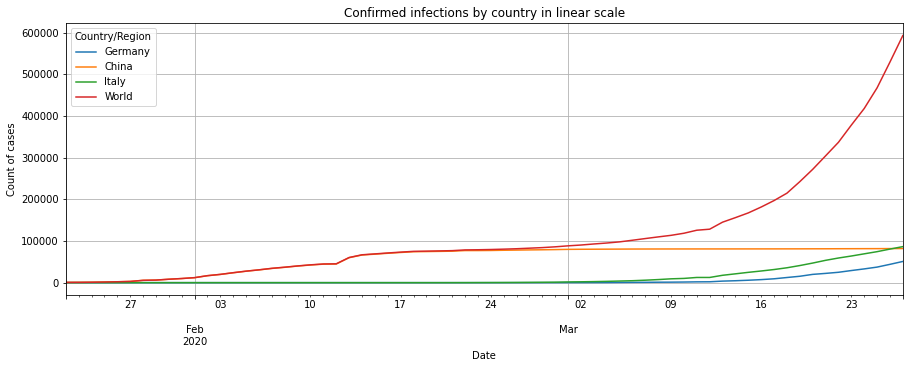

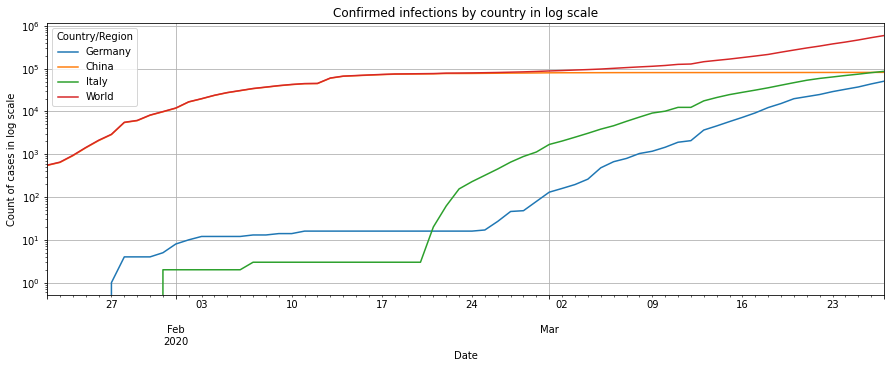

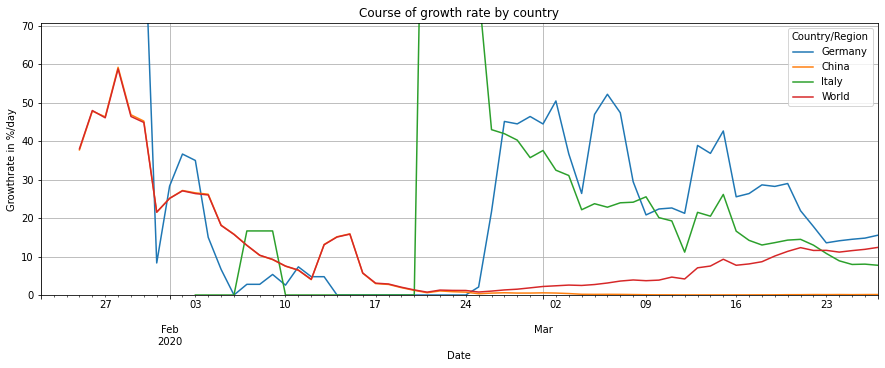

In [12]:
figure_size = (15,5)
str_timestamp = datetime.now().strftime('%Y%m%d')

# Create figure with linear scaling
ax0 = df_requested.plot(grid=True,title='Confirmed infections by country in linear scale',figsize=figure_size)
ax0.set_xlabel('Date')
ax0.set_ylabel('Count of cases');
plt.savefig(f'{str_timestamp}_covid_19_confirmed_infections_by_country_normal_scale.svg', format='svg', bbox_inches='tight')

# Create figure with log-scaling => If the graph shows a linear increase that indicates true exponential behaviour
ax1 = df_requested.plot(grid=True,logy=True,title='Confirmed infections by country in log scale',figsize=figure_size)
ax1.set_xlabel('Date')
ax1.set_ylabel('Count of cases in log scale');
plt.savefig(f'{str_timestamp}_covid_19_confirmed_infections_by_country_log_scale.svg', format='svg', bbox_inches='tight')

# Create figure showing the growth rate which is the percentage increase based on the previous day
ax2 = df_requested_growthrate.plot(grid=True,title='Course of growth rate by country',figsize=figure_size)
ax2.set_xlabel('Date')
ax2.set_ylabel('Growthrate in %/day');
ax2.set_ylim(0,max(df_requested_growthrate.quantile(.92)))
plt.savefig(f'{str_timestamp}_covid_19_daily_growthrate_by_country.svg', format="svg", bbox_inches='tight')

## Trying to fit a logistic (sigmoidal) model and make a "projection" for the next couple of days

In [13]:
import numpy as np
from lmfit import Model

In [14]:
def logistic(x, L, tau, x0):
    """Logistic function in base 10 so the parameter tau will represent how many days it takes till we have a 10x of current days cases."""
    return L/(1+np.power(10,-(x-x0)/tau))

Best fitting logistic model based on current days data for each country.



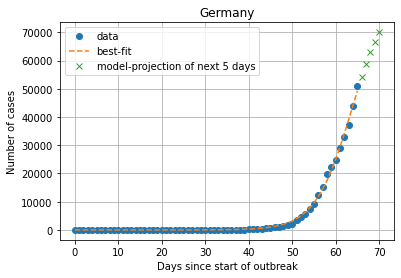

[[Model]]
    Model(logistic)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 74
    # data points      = 66
    # variables        = 3
    chi-square         = 18615132.0
    reduced chi-square = 295478.285
    Akaike info crit   = 834.288820
    Bayesian info crit = 840.857785
[[Variables]]
    L:    86039.1402 +/- 5163.20187 (6.00%) (init = 1)
    tau:  9.72347574 +/- 0.29172049 (3.00%) (init = 1)
    x0:   63.7607738 +/- 0.49903166 (0.78%) (init = 1)
[[Correlations]] (unreported correlations are < 0.100)
    C(L, x0)   =  0.995
    C(tau, x0) =  0.937
    C(L, tau)  =  0.916

*********************************************************************



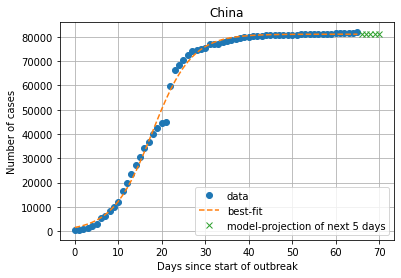

[[Model]]
    Model(logistic)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 71
    # data points      = 66
    # variables        = 3
    chi-square         = 2.6127e+08
    reduced chi-square = 4147096.91
    Akaike info crit   = 1008.63234
    Bayesian info crit = 1015.20130
[[Variables]]
    L:    81093.8428 +/- 365.142592 (0.45%) (init = 1)
    tau:  10.4146576 +/- 0.28901443 (2.78%) (init = 1)
    x0:   17.7848985 +/- 0.14437057 (0.81%) (init = 1)
[[Correlations]] (unreported correlations are < 0.100)
    C(L, x0)   =  0.422
    C(L, tau)  =  0.382
    C(tau, x0) =  0.158

*********************************************************************



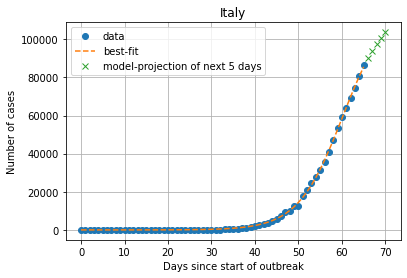

[[Model]]
    Model(logistic)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 83
    # data points      = 66
    # variables        = 3
    chi-square         = 14519462.5
    reduced chi-square = 230467.659
    Akaike info crit   = 817.888823
    Bayesian info crit = 824.457788
[[Variables]]
    L:    119100.838 +/- 1885.36842 (1.58%) (init = 1)
    tau:  11.8489270 +/- 0.14500313 (1.22%) (init = 1)
    x0:   60.1923326 +/- 0.18165234 (0.30%) (init = 1)
[[Correlations]] (unreported correlations are < 0.100)
    C(L, x0)   =  0.989
    C(tau, x0) =  0.911
    C(L, tau)  =  0.897

*********************************************************************



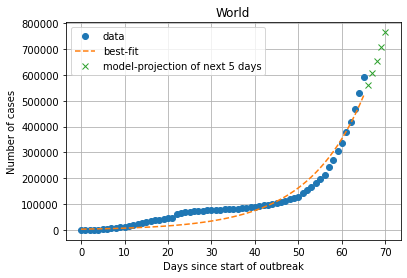

[[Model]]
    Model(logistic)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 1778
    # data points      = 66
    # variables        = 3
    chi-square         = 5.6261e+10
    reduced chi-square = 8.9303e+08
    Akaike info crit   = 1363.19860
    Bayesian info crit = 1369.76757
[[Variables]]
    L:    3.0716e+10 +/- 4.8515e+14 (1579466.55%) (init = 1)
    tau:  29.8391577 +/- 3.94054794 (13.21%) (init = 1)
    x0:   207.367830 +/- 205572.534 (99134.25%) (init = 1)
[[Correlations]] (unreported correlations are < 0.100)
    C(L, x0)   =  1.000
    C(tau, x0) =  0.944
    C(L, tau)  =  0.944

*********************************************************************



In [15]:
# Simulation parameters
num_projected_days = 5

# Preprocessing
model = Model(logistic)
country_models = dict()
num_data_days = len(df_requested.index)

print('Best fitting logistic model based on current days data for each country.\n')

for country in df_requested.columns:
    # Building the x and y data-vectors for analysis
    x = np.arange(0,num_data_days)
    y = df_requested[country].values
    
    # Constructing another separate x-vector for the future-projection
    x_projected = np.arange(num_data_days,num_data_days+num_projected_days)
    
    # Build the initial parameters and fit the model
    params = model.make_params(**{name:1 for name in model.param_names})
    result = model.fit(y, params, x=x)
    
    # Calculated the projection from the fitted model
    y_projection = model.eval(result.params, x=x_projected)
    
    # Pack everything into an object for later evaluation/usage
    result.best_values.update({'Quality':result.chisqr})
    country_models[country] = result.best_values
    
    # Immediately plot the results
    result.plot_fit(datafmt='o',fitfmt='--')
    plt.title(country)
    plt.plot(x_projected, y_projection,'x',label=f'model-projection of next {num_projected_days} days')
    plt.legend();
    plt.xlabel('Days since start of outbreak')
    plt.ylabel('Number of cases')
    plt.ticklabel_format(style='plain')
    plt.grid(True)
    plt.show()
    
    # Plot the model-fitting-report
    print(result.fit_report())
    print('\n*********************************************************************\n')

## Just show the latest development in growth rate by country

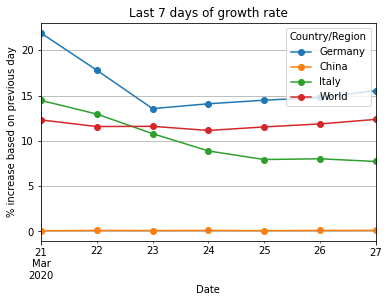

In [16]:
num_days = 7
df_requested_growthrate.last(f'{num_days}D').plot(grid=True, style='o-')
plt.xlabel('Date')
plt.ylabel('% increase based on previous day')
plt.title(f'Last {num_days} days of growth rate')
plt.show()

In [17]:
print('Latest case figures')
df_requested.tail(10)

Latest case figures


Country/Region,Germany,China,Italy,World
2020-03-18,12327,81102,35713,214821
2020-03-19,15320,81156,41035,242500
2020-03-20,19848,81250,47021,272035
2020-03-21,22213,81305,53578,304396
2020-03-22,24873,81435,59138,336953
2020-03-23,29056,81498,63927,378235
2020-03-24,32986,81591,69176,418045
2020-03-25,37323,81661,74386,467653
2020-03-26,43938,81782,80589,529591
2020-03-27,50871,81897,86498,593291


In [18]:
print('Latest growth rates')
df_requested_growthrate.tail(10)

Latest growth rates


Country/Region,Germany,China,Italy,World
2020-03-18,28.649354,0.040723,13.006360,8.657938
2020-03-19,28.246869,0.050572,13.619002,10.142109
2020-03-20,29.000088,0.078897,14.280899,11.351275
2020-03-21,21.917243,0.083367,14.478172,12.319986
2020-03-22,17.815555,0.114470,12.969925,11.590295
2020-03-23,13.569320,0.101649,10.806745,11.614354
2020-03-24,14.106003,0.117122,8.895443,11.157457
2020-03-25,14.497013,0.092423,7.946817,11.547809
2020-03-26,14.799088,0.116027,8.027126,11.878768
2020-03-27,15.550237,0.124862,7.734238,12.379750


## Trying to evaluate the "long therm quality" of the model: Try to fit the model for each of the past days with only the data avaliable until that point and see how the model output changes over time.

Now comparing best-fit-models of "Germany" for the following days  ['29.01.2020', '13.02.2020', '28.02.2020', '14.03.2020', '27.03.2020']


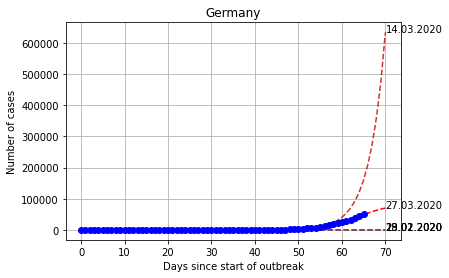

Now comparing best-fit-models of "China" for the following days  ['29.01.2020', '13.02.2020', '28.02.2020', '14.03.2020', '27.03.2020']


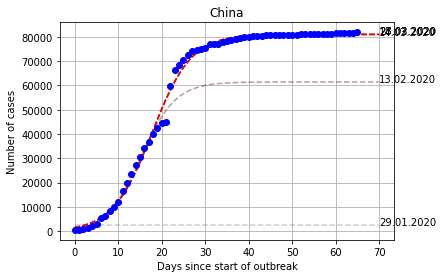

Now comparing best-fit-models of "Italy" for the following days  ['29.01.2020', '13.02.2020', '28.02.2020', '14.03.2020', '27.03.2020']


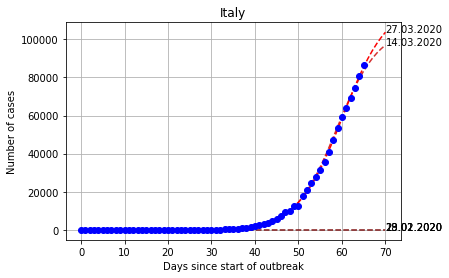

Now comparing best-fit-models of "World" for the following days  ['29.01.2020', '13.02.2020', '28.02.2020', '14.03.2020', '27.03.2020']


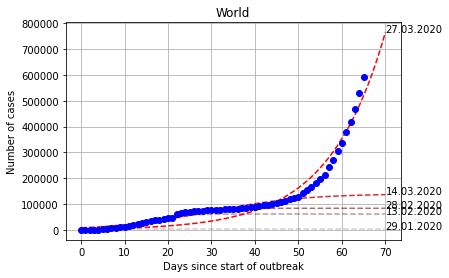

In [19]:
# Evaluation parameters
min_num_of_days_for_moddeling = 7
number_of_samplepoints_to_plot = 5
requested_time_format = '%d.%m.%Y'

# A little helperfunction for equidistant sampling
from math import ceil
def takespread(sequence, num):
    length = float(len(sequence))
    for i in range(num,):
        yield sequence[int(ceil(i * length / num))]
        
# Preprocessing
model = Model(logistic)
country_models = dict()
num_data_days = len(df_requested.index)
params = model.make_params(**{name:1 for name in model.param_names})

for country in df_requested.columns:
    # Dict to hold the simulation data for each day for later evaulation/usage
    country_results = dict()
    
    # Construct vectors of all known data  
    x_full = np.arange(0,num_data_days)
    y_full = df_requested[country].values
    
    # Construct a separate vector for the projected days
    x_extended = np.arange(0,num_data_days+num_projected_days)
    
    # Construct a list of datapoints to actually include in the plot    
    instances_to_plot = list(takespread(x[min_num_of_days_for_moddeling:],number_of_samplepoints_to_plot-1))
    instances_to_plot.append(x[-1])
    
    print(f'Now comparing best-fit-models of "{country}" for the following days ', [df_requested.index[i].strftime(requested_time_format) for i in instances_to_plot])
    
    # Start iterating over the historic data-time-range
    for idx, date in enumerate(df_requested.index):
        # Omit the first couple of days as they would not yield a valid model anyways
        if idx < (min_num_of_days_for_moddeling-1) or not idx in instances_to_plot: continue
        
        # Building vectors for the model to evaluate on
        x_known = x_full[:idx+1]
        y_known = y_full[:idx+1]
        
        # Fitting the model
        result = model.fit(y_known, params, x=x_known)
        
        # Collect everything into a dict and store it
        result.best_values.update({'quality':result.chisqr})
        country_results[date] = result.best_values#{'results':result.best_values,'model':result}
        
        # Print the model evaluation for the entire time-horizont
        y_modeled = model.eval(result.params, x=x_extended)
        
        # Add the line to figure with variing color and opacity
        plt.plot(x_extended, y_modeled, '--', label=date, color=(idx/num_data_days,0,0,.1+(idx/num_data_days)*.9))
        
        # Add the date of the line to the figure
        plt.text(x_extended[-1], y_modeled[-1], date.strftime(requested_time_format))
    
    # Add the original data to the figure
    plt.plot(x_full, y_full, 'o', color=(0,0,1))
    plt.title(country)
    plt.xlabel('Days since start of outbreak')
    plt.ylabel('Number of cases')
    plt.ticklabel_format(style='plain')
    plt.grid(True)
    plt.show()

    # Save the model results for later evaluation/usage
    country_models[country] = country_results

# Conclusions as of 21.03.2020: 
## 1. The growth rate appears to be exponential at current date. Hopefully the governmental quarantine measures will take effect on the figures within the next two weeks.
## 2. The models initial projections have always been to low and needed correction to higher figures. In other words the best-fit-models values were to "optimistic".  
## 3. It seems to be hard to fit a matching and "long term stable" logistic function to the current data... making predictions is not a good idea (just as I expected)

### Stay healthy and try to keep your social-distance,
### Jan Macenka